## Something is not normal

This is probably the point where I should bring this up, but this is not the normal way that people generally go about teaching confidence intervals and hypothesis tests. 

Generally speaking people will walk down the road of old school inferential statistics and teach you confidence intervals and hypothesis tests using the Central Limit Theorem and Normal distributions. 

There are two reasons that I am not doing this:

1. This would require a lot more stats knowledge to fully understand and grasp
2. This is much less powerful than bootstrap confidence intervals and hypothesis tests

And for those reasons we are sticking with bootstrap tests. 

Let me make one final point here: there are sooo many ways to do the above! There are hundreds of ways that do better under one condition or another, so I have tried to optimize for versatility and simplicity when choosing the methods I show below. 

Before we continue, we need to look at the assumptions again, because WITHOUT THE ASSUMPTIONS WE CANNOT DO CONFIDENCE INTERVALS OR HYPOTHESIS TESTS!!!

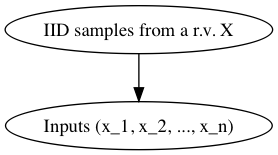

In [1]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('IID samples from a r.v. X')
G.add_node('Inputs (x_1, x_2, ..., x_n)')
G.add_edge('IID samples from a r.v. X', 'Inputs (x_1, x_2, ..., x_n)')
draw(G)

## Confidence intervals

The first thing that I will show you is a bootsrap confidence interval. A confidence interval is a range that we say the true statistic of the population distribution is likely to fall in. 

How do we get it?

First step is to generate the approximate distribution of the approximate sampling distribution of the population statistic. We do this below:

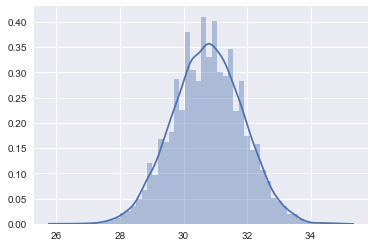

In [12]:
%matplotlib inline
import seaborn as sns
import numpy as np

population_dist = np.random.poisson(30, size=1000)

sample = np.random.choice(population_dist, 20, replace=False)

bootstrap_samples = [np.mean(np.random.choice(sample, 20, replace=True)) for _ in range(10000)]

sns.distplot(bootstrap_samples)

Now I ask you, okay given this distribution, and I asked you where the true population mean lay, where would you say? Probably somewhere in the middle? This seems to be what we would be getting most of the time.

Would you expect that the true statistic would be 35? No, not really. Then why would almost all the samples report statistics less than it?

The intuition behind the confidence interval is that your interval will contain all the values that are likely to occur and you will throw out the extreme values. 

Specifically if you are looking for a 95% confidence interval, you will throw out the 2.5% of values that are too low and the 2.5% of values that are too high. Below is our calculation of the bootstrap confidence interval:

In [14]:
print np.percentile(bootstrap_samples, 2.5)
print np.percentile(bootstrap_samples, 97.5)

28.65
32.9


Seaborn even has nice visualizations of confidence intervals built in:

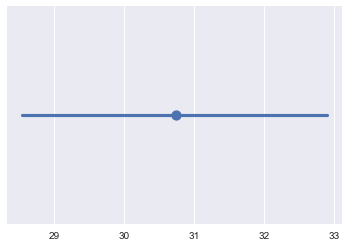

In [20]:
sns.pointplot(sample, ci=95)

Now before we move on I want to say something on the method we use here, and that is on the randomness. 

Where does the randomness come from?

We have a sampling distribution for our true population statistic. Does this mean that the true population statistic is random? 

No

What this means is that by taking RANDOM SAMPLES we get RANDOM ESTIMATES OF THE POPULATION STATISTIC. The population statistic stays the same.

So when we say that we are 95% confident that the true population statistic lies within these bounds that are generated via random sampling, what we mean is that 95% of the time we will sample such that the bounds contain the true population statistic. 

This is a crucial difference to understand, so feel free to go through this section twice.

## Hypothesis Testing

The next powerful tool that we will be using now that we have access to the approximate sampling distribution from bootstrap is called hypothesis testing. 

In this case the question is:

<blockquote>
I hypothesize that the statistic of a population distribution is XYZ, do I have enough evidence to reject it? 
</blockquote>

Notice the way that I am framing the question.  It is actually a question of the evidence (the sample we got) rather than anything else. 

Again the first step here is to get the bootstrap samples:

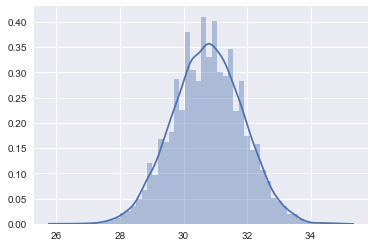

In [22]:
sns.distplot(bootstrap_samples)

Let's say our hypothesis is that the mean of the poplulation distribution is 30, and I want to be 95% confident that I will have rightly rejected this hypothesis if I do. 

Let me show you what our hypothesis looks like on this graph:

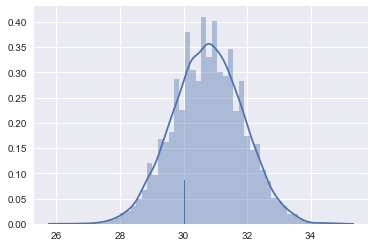

In [25]:
sns.distplot(bootstrap_samples)
sns.rugplot([30], height=.2)

Well, by the look of it, this hypothesis seems plausible.

But let's be a bit more formal and get a p value. A p-value tells you: If I reject this hypothesis, what percent of the time will I be wrong.

To get the p value in a bootstrap hypothesis test you simply look for the fraction of values more extreme than your hypothesis (values smaller in this case because 30 is smaller than the median):

In [35]:
pvalue = (np.array(bootstrap_samples) < 30.0).mean()
pvalue

0.23760000000000001

Then because there can be extreme small values and extreme large values, you multiply that number by 2

In [36]:
pvalue * 2

0.47520000000000001

So in this case we can only be 51.5% sure that we can reject this hypothesis correctly, so we say we don't have enough evidence to reject the hypothesis.

Again I caution you as to where the randomness comes from. What we know is that if you were to sample this approximate distribution, 47.5% of the values would be more extreme than this one, or even more practically, 47.5% of the bootstrap samples gave statistics more extreme than this one.

We then make the leap to not rejecting the hypothesis.

Generally people reject hypotheses that have a pvalue less than .05.

## Why this matters

Well hopefully you can see how this matters a ton! Any time you are curious about characteristics of a population based on data that you get from a sample, these techniques can help you ascertain reasonable bounds for that characteristic or falsify your assumptions.

What is most important to remember is that you can't just use these techniques willy nilly! You must satisfy the assumptions above, and only then will the techniques prove correct! 